# WeatherPy
----

### My Analysis
* The weather becomes warmer as the cities get closer the equator (0 Deg. Latitude). However, there are some cities that are farther away and have the same temperature as ones that are right near the equator which is interesting
* There is no true relationship between latitude and cloudiness. The wind speed seems to be a low for most cities this time of year
* Most cities around this time have over 60% humidity

---
### Note
* I will not be including my config file as I do not want to load my API key for the OpenWeatherMap.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import open_weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Build the base url
base_url = "http://api.openweathermap.org/data/2.5/weather?APPID=" + open_weather


{'coord': {'lon': -74.98, 'lat': 39.31},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 291.74,
  'pressure': 1024,
  'humidity': 89,
  'temp_min': 289.85,
  'temp_max': 293.15},
 'visibility': 16093,
 'wind': {'speed': 1.5, 'deg': 270},
 'clouds': {'all': 1},
 'dt': 1538265360,
 'sys': {'type': 1,
  'id': 1971,
  'message': 0.0042,
  'country': 'US',
  'sunrise': 1538304904,
  'sunset': 1538347441},
 'id': 4501427,
 'name': 'Port Elizabeth',
 'cod': 200}

In [40]:
# Set variables to use in the loop
count = 0 
set_count = 1

# Create empty DataFrames to hold data received
cities_df = []
cloudiness = []
country = [] 
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Print Header 
print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    count = count + 1
    time.sleep(1)
    
    try:
        # Make Request for City
        weather_url = base_url + "&q=" + city
        response_json = requests.get(weather_url).json()
        
        # Store values into variables
        cities_df.append(response_json["name"])
        cloudiness.append(response_json["clouds"]["all"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        humidity.append(response_json["main"]["humidity"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        wind_speed.append(response_json["wind"]["speed"])
        print(f"Processing Record {count} of Set {set_count} | {city} ")
    
        if count == 50:
            time.sleep(30)
            count = 0
            set_count = set_count + 1
    except:
        print("City not found. Skipping... ")
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

# Add values to Dictionary
weather_dict = {
        "City": cities_df,
        "Cloudiness": cloudiness,
        "Country": country,
        "Date": date,
        "Humidity": humidity,
        "Lat": lat,
        "Lng": lng,
        "Max Temp": max_temp,
        "Wind Speed": wind_speed
}

# create DataFrame with Gathered Data
weather_data = pd.DataFrame(weather_dict)
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | yulara 
Processing Record 2 of Set 1 | santa rosa 
Processing Record 3 of Set 1 | punta arenas 
Processing Record 4 of Set 1 | kodiak 
Processing Record 5 of Set 1 | adrar 
Processing Record 6 of Set 1 | ushuaia 
Processing Record 7 of Set 1 | airai 
Processing Record 8 of Set 1 | longyearbyen 
Processing Record 9 of Set 1 | cabo san lucas 
City not found. Skipping... 
Processing Record 11 of Set 1 | jamestown 
Processing Record 12 of Set 1 | bredasdorp 
Processing Record 13 of Set 1 | tuatapere 
Processing Record 14 of Set 1 | mwinilunga 
Processing Record 15 of Set 1 | geraldton 
Processing Record 16 of Set 1 | busselton 
Processing Record 17 of Set 1 | castro 
Processing Record 18 of Set 1 | ilulissat 
Processing Record 19 of Set 1 | narsaq 
City not found. Skipping... 
City not found. Skipping... 
Processing Record 22 of Set 1 | hailar 
Processing Record 23 of Set 1 | nikolskoye 
Processing Record

Processing Record 1 of Set 5 | mar del plata 
Processing Record 2 of Set 5 | okhotsk 
Processing Record 3 of Set 5 | balangiga 
Processing Record 4 of Set 5 | hithadhoo 
Processing Record 5 of Set 5 | normandin 
Processing Record 6 of Set 5 | avarua 
Processing Record 7 of Set 5 | peterhead 
Processing Record 8 of Set 5 | arlit 
Processing Record 9 of Set 5 | tarbagatay 
City not found. Skipping... 
City not found. Skipping... 
Processing Record 12 of Set 5 | new plymouth 
Processing Record 13 of Set 5 | beyneu 
Processing Record 14 of Set 5 | opuwo 
Processing Record 15 of Set 5 | venice 
Processing Record 16 of Set 5 | grand gaube 
Processing Record 17 of Set 5 | kawardha 
Processing Record 18 of Set 5 | arraial do cabo 
Processing Record 19 of Set 5 | portoferraio 
Processing Record 20 of Set 5 | porto novo 
City not found. Skipping... 
City not found. Skipping... 
Processing Record 23 of Set 5 | chimbote 
Processing Record 24 of Set 5 | jalu 
Processing Record 25 of Set 5 | kalmuna

City not found. Skipping... 
Processing Record 4 of Set 9 | san vicente 
City not found. Skipping... 
Processing Record 6 of Set 9 | imeni poliny osipenko 
Processing Record 7 of Set 9 | kirkenaer 
Processing Record 8 of Set 9 | bati 
Processing Record 9 of Set 9 | amahai 
Processing Record 10 of Set 9 | bluefield 
City not found. Skipping... 
Processing Record 12 of Set 9 | petropavlovsk-kamchatskiy 
City not found. Skipping... 
Processing Record 14 of Set 9 | tautira 
Processing Record 15 of Set 9 | bada 
Processing Record 16 of Set 9 | tsabong 
City not found. Skipping... 
Processing Record 18 of Set 9 | zabol 
Processing Record 19 of Set 9 | san rafael 
Processing Record 20 of Set 9 | lokoja 
Processing Record 21 of Set 9 | linjiang 
Processing Record 22 of Set 9 | camocim 
Processing Record 23 of Set 9 | morros 
Processing Record 24 of Set 9 | vanino 
Processing Record 25 of Set 9 | mithi 
City not found. Skipping... 
Processing Record 27 of Set 9 | port-cartier 
Processing Record

Processing Record 3 of Set 13 | semnan 
Processing Record 4 of Set 13 | saint-georges 
Processing Record 5 of Set 13 | beni 
Processing Record 6 of Set 13 | puerto madryn 
City not found. Skipping... 
Processing Record 8 of Set 13 | masunga 
City not found. Skipping... 
Processing Record 10 of Set 13 | marawi 
Processing Record 11 of Set 13 | siniscola 
Processing Record 12 of Set 13 | namatanai 
Processing Record 13 of Set 13 | merauke 
Processing Record 14 of Set 13 | kindu 
Processing Record 15 of Set 13 | banyo 
Processing Record 16 of Set 13 | cortes 
Processing Record 17 of Set 13 | sao miguel do tapuio 
Processing Record 18 of Set 13 | sorland 
Processing Record 19 of Set 13 | katobu 
Processing Record 20 of Set 13 | awjilah 
Processing Record 21 of Set 13 | ozinki 
Processing Record 22 of Set 13 | shingu 
Processing Record 23 of Set 13 | port blair 
Processing Record 24 of Set 13 | baikunthpur 
Processing Record 25 of Set 13 | zyryanka 
Processing Record 26 of Set 13 | constant

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
weather_data.to_csv("output/weather_data.csv")

In [43]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yulara,20,AU,1538270580,22,-25.24,130.99,297.150,10.30
1,Santa Rosa,0,AR,1538273157,61,-36.62,-64.29,282.603,4.37
2,Punta Arenas,90,CL,1538267400,93,-53.16,-70.91,275.150,6.20
3,Kodiak,90,US,1538268780,86,39.95,-94.76,288.750,2.10
4,Adrar,0,DZ,1538273161,53,27.87,-0.29,291.203,0.97


In [48]:
weather_data.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

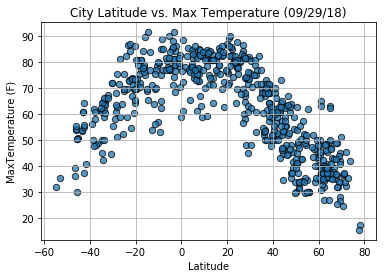

In [70]:
# Convert Max Temp from Kelvin to Fahrenheit
weather_data["Max Temp"] = weather_data["Max Temp"] * (9/5) - 459.67

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], s=40, alpha=0.75, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (09/29/18)")
plt.ylabel("MaxTemperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("MaxTemperatureInCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

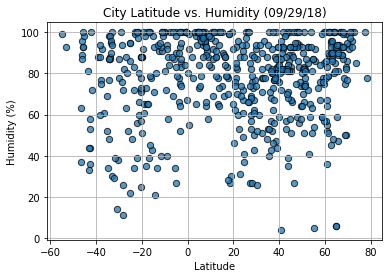

In [61]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], s=40, alpha=0.75, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (09/29/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

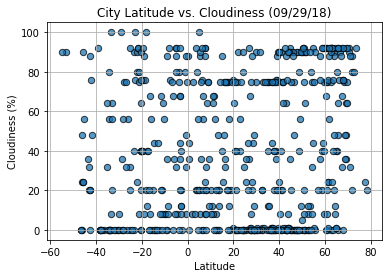

In [62]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], s=40, alpha=0.75, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (09/29/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

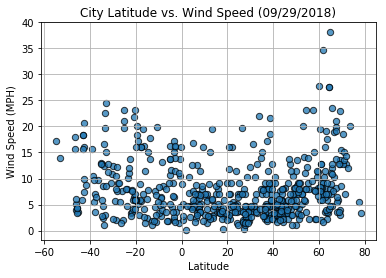

In [75]:
# Convert Wind Speed from m/s2 to MPH
weather_data_mph = weather_data["Wind Speed"] * 2.236936

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data_mph, s=40, alpha=0.75, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (09/29/2018)")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInCities.png")

# Show plot
plt.show()